In [1]:
import numpy as np
import pandas as pd
import nltk 

In [2]:
genres = pd.read_json('genres.json.gz', orient='record', lines=True)

wiki_movies = pd.read_json('wikidata-movies.json.gz', orient='record', lines=True)
rt = pd.read_json('rotten-tomatoes.json.gz', orient='record', lines=True)
omdb= pd.read_json('omdb-data.json.gz', orient='record', lines=True)


In [3]:
#wiki_movies[wiki_movies['original_language'] == 'Q1568' ]
#rt
#omdb

## Country of Origin Stats

In [4]:
wiki = wiki_movies.filter(items=['original_language', 'enwiki_title'])
wiki1 = wiki.groupby('original_language').count()
wiki1 = wiki1.sort_values(by=['enwiki_title'])
wiki1=wiki1.reset_index()

In [5]:
#import matplotlib.pyplot as plt
#plt.hist(wiki1['original_language'].values)
#plt.show()
import seaborn as sns
sns.set()
summ =  wiki1['enwiki_title'].sum()

def calc(row):
    return row['enwiki_title']/summ * 100

wiki1['percent']=wiki1.apply(func=calc,axis=1)
wiki_bylanguage = wiki1.sort_values(by='percent',ascending=False).reset_index()
wiki_bylanguage[:10]

,index,original_language,enwiki_title,percent
0,156,Q1860,26228,66.495956
1,155,Q150,2475,6.274878
2,154,Q652,1338,3.392237
3,153,Q188,1187,3.009406
4,152,Q1321,1163,2.948559
5,151,Q5287,1059,2.684887
6,150,Q1568,920,2.332480
7,149,Q9186,630,1.597242
8,148,Q9176,517,1.310752
9,147,Q7737,505,1.280329


## Season of each movie

In [6]:
rt

,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,imdb_id,rotten_tomatoes_id
0,3.9,86.0,33125227.0,7.1,79.0,tt0325980,m/pirates_of_the_caribbean_the_curse_of_the_bl...
1,4.1,80.0,2139.0,7.8,88.0,tt4882376,m/first_they_killed_my_father_a_daughter_of_ca...
2,3.6,71.0,11482.0,7.6,86.0,tt0099763,m/henry_portrait_of_a_serial_killer
3,3.6,66.0,187204.0,6.6,66.0,tt1371111,m/cloud_atlas_2012
4,3.9,84.0,26836.0,7.4,80.0,tt1189073,m/the_skin_i_live_in
5,3.7,74.0,1498.0,7.0,88.0,tt1787725,m/if_a_tree_falls_a_story_of_the_earth_liberat...
6,3.6,85.0,92824.0,6.6,73.0,tt0117665,m/1073595-sleepers
7,3.2,50.0,242347.0,4.9,35.0,tt1611224,m/abraham_lincoln_vampire_hunter
8,4.0,87.0,427.0,7.4,100.0,tt3966544,m/lost_soul_the_doomed_journey_of_richard_stan...
9,3.7,74.0,260776.0,7.4,85.0,tt0780521,m/1196003-princess_and_the_frog


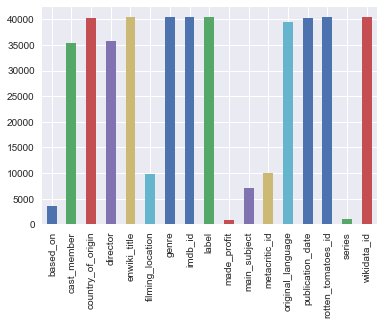

In [7]:
wiki_movies.count().plot.bar()

In [8]:
wiki_movies.count()

based_on               3483
cast_member           35434
country_of_origin     40158
director              35835
enwiki_title          40430
filming_location       9705
genre                 40430
imdb_id               40430
label                 40404
made_profit             791
main_subject           7043
metacritic_id          9960
original_language     39443
publication_date      40199
rotten_tomatoes_id    40430
series                  915
wikidata_id           40430
dtype: int64

In [9]:
wiki_movies['made_profit'].value_counts() #information not available means NAN = no information given

1.0    665
0.0    126
Name: made_profit, dtype: int64

In [10]:
wiki_movies.dtypes

based_on               object
cast_member            object
country_of_origin      object
director               object
enwiki_title           object
filming_location       object
genre                  object
imdb_id                object
label                  object
made_profit           float64
main_subject           object
metacritic_id          object
original_language      object
publication_date       object
rotten_tomatoes_id     object
series                 object
wikidata_id            object
dtype: object

In [11]:
#wiki_movies

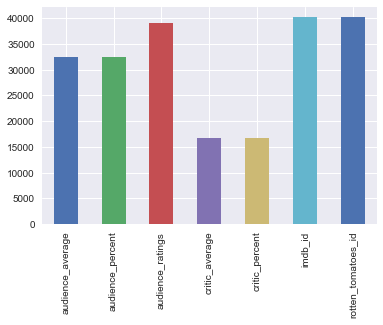

In [12]:
rt1 = rt[['imdb_id', 'critic_percent', 'audience_percent', 'audience_ratings','critic_average']]
rt.count().plot.bar()

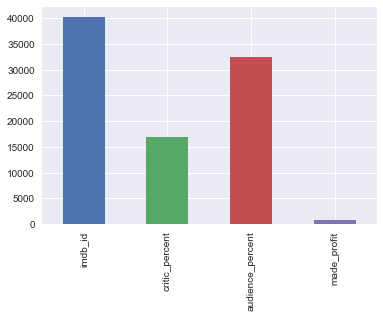

In [13]:
wiki_movies2 = wiki_movies[['imdb_id', 'made_profit']].dropna()
import seaborn as sns
sns.set()
profit_movie = pd.merge(rt1, wiki_movies2, on='imdb_id', how='outer')
profit_movie = profit_movie[['imdb_id', 'critic_percent', 'audience_percent','made_profit']]
#profit_movie = profit_movie.dropna()
profit_movie.count().plot.bar() #made profit or not. 



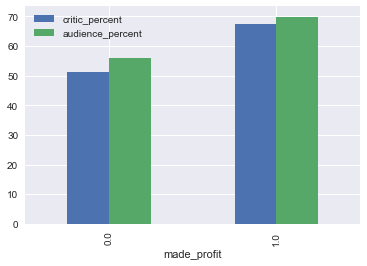

In [14]:


profit_movie.groupby('made_profit').mean().plot.bar() #profitable movies have higher critic and audience ratings. 

In [15]:
profit_movie.groupby('made_profit').mean()

,critic_percent,audience_percent
made_profit,,
0.0,51.369369,55.975207
1.0,67.499200,69.827160


In [16]:
#profit_movie = pd.merge(rt1, wiki_movies2, on='imdb_id', how='outer')
#profit_movie

In [17]:
#profit_movie['audience_percent'].plot.bar()

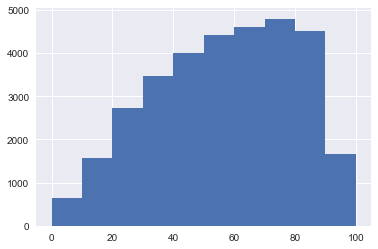

In [18]:
profit_movie['audience_percent'].hist()

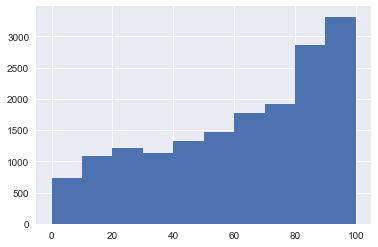

In [19]:
profit_movie['critic_percent'].hist()

In [20]:
director_data = wiki_movies[['director','imdb_id']]
movie_ratings = rt[['imdb_id', 'critic_percent', 'audience_percent' ]]

In [21]:

director_ratings = pd.merge( movie_ratings, director_data, on='imdb_id', how ='outer')


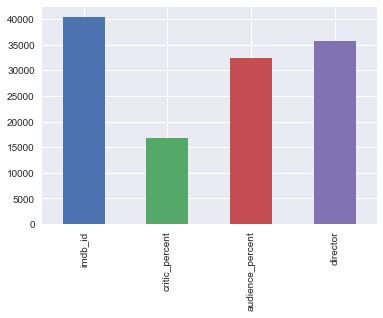

In [22]:
director_ratings = director_ratings[['imdb_id', 'critic_percent', 'audience_percent' , 'director']]

director_ratings.count().plot.bar()

In [23]:
director_audiencR = director_ratings[['audience_percent','director']]
def astype(row):
    return str(row['director'])

director_audiencR['director']=director_audiencR.apply(func=astype,axis=1)
director_audiencR = director_audiencR.groupby('director').mean().reset_index()
director_audiencR= director_audiencR.dropna()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


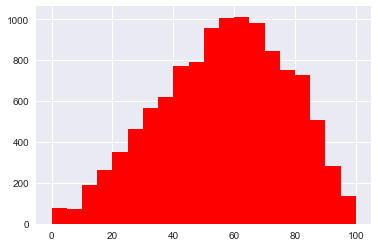

In [24]:
director_audiencR['audience_percent'].hist(bins = 20, color = 'red')

In [25]:
director_audiencR = director_ratings[['critic_percent','director']]
def astype(row):
    return str(row['director'])

director_audiencR['director']=director_audiencR.apply(func=astype,axis=1)
director_audiencR = director_audiencR.groupby('director').mean().reset_index()
director_audiencR= director_audiencR.dropna()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


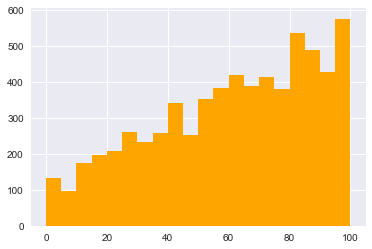

In [26]:
director_audiencR['critic_percent'].hist( bins = 20, color = 'orange')

In [27]:
import time
from datetime import date

wiki_movies['publication_date'] = pd.to_datetime(wiki_movies['publication_date'])






/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


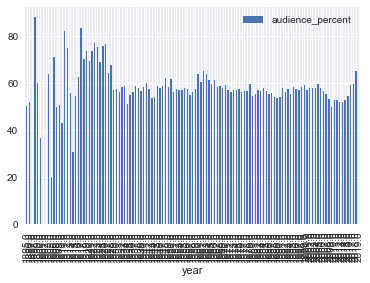

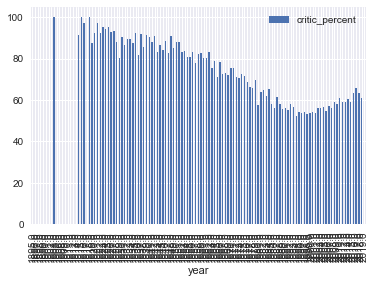

In [28]:
movie_season = wiki_movies[['imdb_id', 'publication_date']]
def getmonth(month):
    return month['publication_date'].month
movie_season['month']= movie_season.apply(func=getmonth,axis=1)

def getyear(year):
    return year['publication_date'].year

movie_season['year'] = movie_season.apply(func=getyear,axis=1)

ratings = rt[['imdb_id' , 'critic_percent', 'audience_percent' ]]

movie_year = pd.merge( ratings , movie_season, on='imdb_id', how ='outer')

audience_percent = movie_year[['audience_percent', 'year']] 
critic_percent = movie_year[['critic_percent', 'year']] 

audience_percent.groupby('year').mean().plot.bar()
critic_percent.groupby('year').mean().plot.bar()




In [29]:
ratings = rt1[['imdb_id' , 'critic_percent', 'audience_percent' ]]
movie_season = pd.merge( ratings , movie_season, on='imdb_id', how ='outer')
audience_percent = movie_season[['audience_percent', 'month']] 
critic_percent = movie_season[['critic_percent', 'month']] 


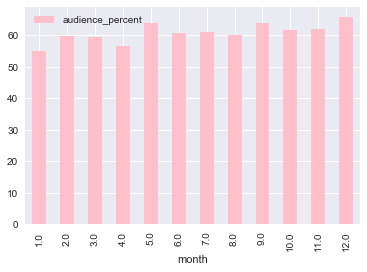

In [30]:
audience_percent.groupby('month').mean().plot.bar(color = 'pink')

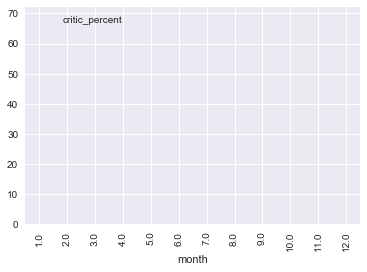

In [31]:
critic_percent.groupby('month').mean().plot.bar(color = '')

In [32]:
import re 

def process_awards1(row) : 
    awards_text=row['omdb_awards'].lower()
    NOMINATION_REGEX=r'[0-9]* nominations'
    if re.search(NOMINATION_REGEX,awards_text) is not None:       
        nomination_num=int(re.search(NOMINATION_REGEX,awards_text).group()[0])
    else:
        nomination_num=0
    return nomination_num

def process_awards2(row) : 
    awards_text=row['omdb_awards'].lower()
    WIN_REGEX =r'[0-9]* wins'
    if re.search(WIN_REGEX,awards_text) is not None:
        win_num = int(re.search(WIN_REGEX,awards_text).group()[0])
    else:
        win_num=0
        
    return win_num

def process_awards3(row) : 
    awards_text=row['omdb_awards'].lower()
    OSCAR_REGEX=r'[0-9]* oscars'
    if re.search(OSCAR_REGEX,awards_text) is not None:      
        oscar_num=int(re.search(OSCAR_REGEX,awards_text).group()[0])
    else:
        oscar_num=0
    return oscar_num
    
def process_awards4(row) : 
    awards_text=row['omdb_awards'].lower()
    GOLDENGATE_REGEX=r'[0-9]* golden globe'
    if re.search(GOLDENGATE_REGEX,awards_text) is not None: 
        goldengate_num=int(re.search(GOLDENGATE_REGEX,awards_text).group()[0])
    else:
        goldengate_num=0
    return goldengate_num


def process_awards5(row) : 
    awards_text=row['omdb_awards'].lower()     
    BAFTA_REGEX=r'[0-9]* bafta'
            
    if re.search(BAFTA_REGEX,awards_text) is not None:
        bafta_num = int(re.search(BAFTA_REGEX,awards_text).group()[0])
    else:
        bafta_num=0
    return bafta_num
       
omdb['num_nominations']=omdb.apply(func=process_awards1,axis=1)
omdb['num_awards']=omdb.apply(func=process_awards2,axis=1) 
omdb['num_oscars']=omdb.apply(func=process_awards3,axis=1) 
omdb['num_golden_globe']=omdb.apply(func=process_awards4,axis=1) 
omdb['num_bafta']=omdb.apply(func=process_awards5,axis=1) 

omdb_awards = omdb[['imdb_id','num_nominations','num_awards', 'num_oscars', 'num_golden_globe', 'num_bafta']]

In [33]:
#np.hstack(wiki_movies['genre']).tolist()
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
wiki_movies['genre2']=wiki_movies.apply(func=lambda row:" ".join(row['genre']),axis=1)
df1=pd.DataFrame(vec.fit_transform(wiki_movies['genre2']).toarray(),columns=vec.get_feature_names()).reset_index()


In [34]:
rt = rt[['imdb_id' , 'critic_percent', 'audience_percent', 'audience_ratings', 'audience_average', 'critic_average']]
wiki_movies2 = wiki_movies[['imdb_id', 'made_profit']]
best_variables = pd.merge( rt ,wiki_movies2 , on='imdb_id', how ='outer')
best_variables = pd.merge(best_variables,omdb_awards,on='imdb_id', how ='outer' )

In [35]:
wiki_movies = wiki_movies.reset_index()
#wiki_movies

In [36]:
#best_variables #y variables. 
#pd.merge( best_variables, director_data, on='index', how ='outer')

In [37]:
#import seaborn as sns
#sns.pairplot(best_variables.dropna())

In [38]:
#np.hstack(wiki_movies['genre']).tolist()
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
wiki_movies['genre2']=wiki_movies.apply(func=lambda row:" ".join(row['genre']),axis=1)
df1=pd.DataFrame(vec.fit_transform(wiki_movies['genre2']).toarray(),columns=vec.get_feature_names()).reset_index()



In [39]:
best_vars = pd.merge(wiki_movies, df1 , on= 'index', how='outer')
best_vars.columns

Index(['index', 'based_on', 'cast_member', 'country_of_origin', 'director',
       'enwiki_title', 'filming_location', 'genre', 'imdb_id', 'label',
       ...
       'q909586', 'q9168', 'q9259727', 'q926324', 'q93196', 'q93204',
       'q9335577', 'q9503', 'q959790', 'q986699'],
      dtype='object', length=419)

In [40]:
best_vars2 = pd.merge(best_variables, best_vars, on= 'imdb_id', how='outer')

best_vars2.columns.values.tolist()

['imdb_id',
 'critic_percent',
 'audience_percent',
 'audience_ratings',
 'audience_average',
 'critic_average',
 'made_profit_x',
 'num_nominations',
 'num_awards',
 'num_oscars',
 'num_golden_globe',
 'num_bafta',
 'index',
 'based_on',
 'cast_member',
 'country_of_origin',
 'director',
 'enwiki_title',
 'filming_location',
 'genre',
 'label',
 'made_profit_y',
 'main_subject',
 'metacritic_id',
 'original_language',
 'publication_date',
 'rotten_tomatoes_id',
 'series',
 'wikidata_id',
 'genre2',
 'q1033891',
 'q1054574',
 'q10654943',
 'q1067324',
 'q1080374',
 'q1091334',
 'q1096120',
 'q1097273',
 'q1107',
 'q1113999',
 'q1115187',
 'q1117103',
 'q11356864',
 'q1135802',
 'q11366',
 'q11396323',
 'q11399',
 'q11425',
 'q11452132',
 'q1146335',
 'q1147197',
 'q1150666',
 'q1164334',
 'q11661562',
 'q1190502',
 'q1194365',
 'q1196408',
 'q1200678',
 'q1257444',
 'q1259759',
 'q1261214',
 'q12767035',
 'q128758',
 'q12912091',
 'q130232',
 'q130352',
 'q131539',
 'q1320115',
 'q1320

In [41]:
#best_vars_final = best_vars2.drop(col = ['index', 'based_on', 'cast_member', 'country_of_origin', 'eniki_title','filming_location', 'genre', 'label', 'made_profit_y', 'main_subject', 'metacritic_id', 'original_language', 'rotten_tomatoes_id', 'series','wikidata_id',
 #'genre2'])
best_vars_final = best_vars2[['imdb_id',
 'critic_percent',
 'audience_percent',
 'audience_ratings',
 'audience_average',
 'critic_average',
 'made_profit_x',
 'num_nominations',
 'num_awards',
 'num_oscars',
 'num_golden_globe',
 'num_bafta',
 'director',
 'made_profit_y',
 'publication_date',
 'q1033891',
 'q1054574',
 'q10654943',
 'q1067324',
 'q1080374',
 'q1091334',
 'q1096120',
 'q1097273',
 'q1107',
 'q1113999',
 'q1115187',
 'q1117103',
 'q11356864',
 'q1135802',
 'q11366',
 'q11396323',
 'q11399',
 'q11425',
 'q11452132',
 'q1146335',
 'q1147197',
 'q1150666',
 'q1164334',
 'q11661562',
 'q1190502',
 'q1194365',
 'q1196408',
 'q1200678',
 'q1257444',
 'q1259759',
 'q1261214',
 'q12767035',
 'q128758',
 'q12912091',
 'q130232',
 'q130352',
 'q131539',
 'q1320115',
 'q13209138',
 'q132311',
 'q1332055',
 'q13377795',
 'q1339864',
 'q1341051',
 'q1342372',
 'q1344',
 'q1356411',
 'q1361932',
 'q136472',
 'q1366112',
 'q13717554',
 'q1377546',
 'q1395566',
 'q1401416',
 'q1433443',
 'q1436734',
 'q145806',
 'q1464369',
 'q14699093',
 'q15062348',
 'q1519335',
 'q15286013',
 'q1535153',
 'q1538137',
 'q15428604',
 'q1548170',
 'q15637293',
 'q15637299',
 'q15637301',
 'q15637310',
 'q15712918',
 'q15712927',
 'q157394',
 'q157443',
 'q15858553',
 'q15898171',
 'q16049832',
 'q1615638',
 'q1654577',
 'q16575965',
 'q16861950',
 'q16909344',
 'q16950433',
 'q169672',
 'q17013749',
 'q170238',
 'q170539',
 'q17113138',
 'q17175676',
 'q172067',
 'q1723850',
 'q172980',
 'q1740789',
 'q174526',
 'q1747837',
 'q1760864',
 'q1762165',
 'q1776156',
 'q1782964',
 'q1786567',
 'q17884',
 'q1788980',
 'q1800833',
 'q181001',
 'q182015',
 'q182154',
 'q182415',
 'q185529',
 'q185867',
 'q18620604',
 'q186424',
 'q1864294',
 'q188473',
 'q188784',
 'q1894374',
 'q191489',
 'q1919632',
 'q192239',
 'q192881',
 'q193541',
 'q1935609',
 'q193606',
 'q19367312',
 'q193979',
 'q1941707',
 'q1957385',
 'q197949',
 'q19842222',
 'q199701',
 'q1999690',
 'q200092',
 'q20220309',
 'q20267837',
 'q202866',
 'q20442589',
 'q20443008',
 'q20650540',
 'q20652466',
 'q20656232',
 'q20656352',
 'q20664331',
 'q20667180',
 'q20737414',
 'q208505',
 'q208555',
 'q21010853',
 'q2116008',
 'q2118696',
 'q21188110',
 'q21192427',
 'q21209409',
 'q212781',
 'q21322403',
 'q2137852',
 'q21401869',
 'q2143665',
 'q21590660',
 'q217117',
 'q217199',
 'q21802675',
 'q218248',
 'q219557',
 'q222639',
 'q222926',
 'q223685',
 'q223770',
 'q223945',
 'q224700',
 'q224989',
 'q2254193',
 'q2254211',
 'q2254548',
 'q226730',
 'q2290276',
 'q2292320',
 'q229390',
 'q2297927',
 'q22981906',
 'q231302',
 'q2321734',
 'q2356541',
 'q23653',
 'q237338',
 'q23739',
 'q23745',
 'q2376899',
 'q2389651',
 'q23916',
 'q240911',
 'q2421031',
 'q242492',
 'q2439025',
 'q2447078',
 'q2484376',
 'q248583',
 'q24862',
 'q2490520',
 'q24925',
 'q25110269',
 'q25372',
 'q253732',
 'q25379',
 'q2561390',
 'q2561438',
 'q2584671',
 'q2593937',
 'q261636',
 'q2625243',
 'q26268098',
 'q263734',
 'q2642760',
 'q2678111',
 'q270948',
 'q2724311',
 'q2743',
 'q275934',
 'q28026639',
 'q289',
 'q28968258',
 'q28968511',
 'q29197',
 'q2973181',
 'q2973201',
 'q2975633',
 'q2991560',
 'q2991565',
 'q3038946',
 'q304538',
 'q3056541',
 'q3072024',
 'q3072031',
 'q3072039',
 'q3072042',
 'q3072043',
 'q3072049',
 'q31235',
 'q319221',
 'q319226',
 'q320568',
 'q3249257',
 'q326439',
 'q3272147',
 'q332102',
 'q336059',
 'q336107',
 'q336144',
 'q343782',
 'q352904',
 'q36279',
 'q3634883',
 'q3641550',
 'q369747',
 'q37073',
 'q37484',
 'q38072107',
 'q38926',
 'q39427',
 'q39892385',
 'q3990883',
 'q4075563',
 'q40831',
 'q4164344',
 'q41664487',
 'q416747',
 'q4184',
 'q4220915',
 'q4235011',
 'q4292083',
 'q430525',
 'q4382232',
 'q4461646',
 'q457832',
 'q459290',
 'q459435',
 'q4674071',
 'q468478',
 'q4686573',
 'q47009776',
 'q471839',
 'q472637',
 'q4765080',
 'q4774498',
 'q482',
 'q483352',
 'q4836991',
 'q484641',
 'q486263',
 'q4875794',
 'q48834789',
 'q49084',
 'q491158',
 'q4925568',
 'q49451',
 'q4949058',
 'q496523',
 'q4984974',
 'q5035283',
 'q505119',
 'q5145881',
 'q5151495',
 'q5151497',
 'q517386',
 'q52162262',
 'q525350',
 'q5258881',
 'q53094',
 'q531067',
 'q5366020',
 'q5366097',
 'q542475',
 'q5434357',
 'q5442753',
 'q546440',
 'q5769084',
 'q5769663',
 'q5774663',
 'q5778924',
 'q580850',
 'q581714',
 'q583768',
 'q586250',
 'q5897543',
 'q590103',
 'q59126',
 'q5967378',
 'q599558',
 'q603291',
 'q604725',
 'q608862',
 'q622291',
 'q622370',
 'q622548',
 'q622812',
 'q623787',
 'q624771',
 'q628165',
 'q629917',
 'q643684',
 'q643873',
 'q645717',
 'q6457531',
 'q645928',
 'q652256',
 'q6585139',
 'q663106',
 'q665478',
 'q678345',
 'q681737',
 'q690342',
 'q699',
 'q7168625',
 'q7210294',
 'q7225114',
 'q7311396',
 'q7362831',
 'q7379160',
 'q743934',
 'q7444356',
 'q752321',
 'q754803',
 'q7551315',
 'q7569',
 'q7603925',
 'q761469',
 'q7643432',
 'q7644030',
 'q7645884',
 'q7696995',
 'q775169',
 'q775344',
 'q790192',
 'q794912',
 'q80930',
 'q8253',
 'q8261',
 'q8274',
 'q83267',
 'q838368',
 'q842256',
 'q846544',
 'q850412',
 'q851213',
 'q853630',
 'q853873',
 'q858330',
 'q859369',
 'q860626',
 'q8812380',
 'q883179',
 'q904447',
 'q909586',
 'q9168',
 'q9259727',
 'q926324',
 'q93196',
 'q93204',
 'q9335577',
 'q9503',
 'q959790',
 'q986699' ]].dropna().reset_index(drop=True)

In [42]:
best_vars = best_vars_final.drop(columns=['director','made_profit_x', 'publication_date'])


In [43]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt 
res = mutual_info_classif(best_vars.drop(columns=['imdb_id','made_profit_y']).values, best_vars['made_profit_y'].values, discrete_features=True)
dep=dict(list(zip(best_vars.drop(columns=['imdb_id','made_profit_y']).columns,res)))
d=sorted(dep,key=lambda x:x[1],reverse=True)
var_names=['audience_percent','audience_ratings','audience_average','num_nominations','num_awards','num_oscars','num_golden_globe','num_bafta','critic_percent','critic_average']

import seaborn as sns
sns.set()

# plt.figure(figsize=(20, 12))
# plt.grid(True, color= 'skyblue')
# plt.plot(list(dep.keys())[:10],list(dep.values())[:10], color = 'red', linewidth = 5.0, ) #


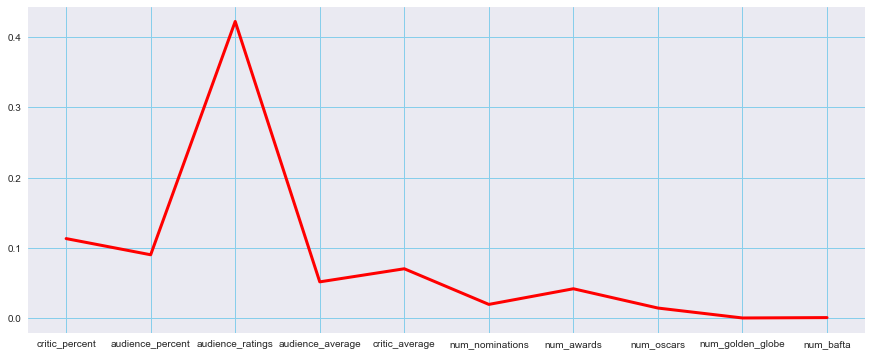

In [44]:
import seaborn as sns
sns.set()

plt.figure(figsize=(15, 6))
plt.grid(True, color= 'skyblue')
plt.plot(list(dep.keys())[:10],list(dep.values())[:10], color = 'red', linewidth = 3.0, ) #



In [45]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

X = best_vars.drop(columns=['imdb_id','made_profit_y']).values
y = best_vars['made_profit_y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)
y_prediction = bayes_model.predict(X_test) 
print(accuracy_score(y_test, y_prediction))
     

0.34156378600823045


In [46]:
# k-nearest neighbours model
from sklearn.neighbors import KNeighborsClassifier 

for k in range(20):
    knn_model = make_pipeline(
    KNeighborsClassifier(n_neighbors=13)
    )
    knn_model.fit(X_train, y_train)
    y_prediction = knn_model.predict(X_test) 
    print(accuracy_score(y_test, y_prediction))




0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712
0.823045267489712


In [47]:
#SVC model 
from sklearn.svm import SVC    
from sklearn.preprocessing import MinMaxScaler

svc_model = make_pipeline(

        SVC(kernel='linear',C=0.001)
    )
    
svc_model.fit(X_train, y_train)
y_prediction = svc_model.predict(X_test) 
print(accuracy_score(y_test, y_prediction))

0.8518518518518519


In [48]:
X = best_vars.drop(columns=['imdb_id','made_profit_y'])
y = best_vars['made_profit_y'].values

feature_names=X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
ARR=[]
max_config=[]
def hyper_parametre(n,kmax):
    max_score=0.0
    for i in range(1,n+1):
        f_list=feature_names[:i]
        #print("f_list=",f_list)
        x = X_train[f_list]
        x_test=X_test[f_list]
        ar=[]
        for j in range(1,kmax+1):
            knn_model = make_pipeline( KNeighborsClassifier(n_neighbors=j) )
            knn_model.fit(x.values, y_train)
            y_prediction = knn_model.predict(x_test) 
            score=accuracy_score(y_test, y_prediction)
            if score>max_score:
                max_score=score
                max_config.append([i,j,f_list])
            ar.append(accuracy_score(y_test, y_prediction))
        ARR.append(ar)
        
    return max_score,max_config
            
mscore,mconfig=hyper_parametre(10,30)        
print("MAX SCORE = {} @ variables = {} ({}) & num_clusters = {}".format(mscore,mconfig[-1][0],mconfig[-1][2],mconfig[-1][1]))



MAX SCORE = 0.875 @ variables = 1 (['critic_percent']) & num_clusters = 21


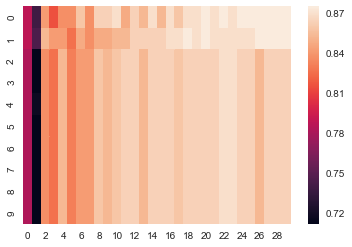

In [49]:
sns.heatmap(ARR)



In [50]:
from sklearn.svm import SVC    
X = best_vars.drop(columns=['imdb_id','made_profit_y'])
y = best_vars['made_profit_y'].values

feature_names=X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
ARR=[]
max_config=[]
def hyper_parametre(n):
    max_score=0.0
    for i in range(1,n):
        f_list=feature_names[:i]
        #print("f_list=",f_list)
        x = X_train[f_list]
        x_test=X_test[f_list]
        ar=[]
        from sklearn.svm import SVC    
        svc_model = make_pipeline(SVC(kernel='linear',C=0.0001))
        svc_model.fit(X_train, y_train)
        y_prediction = svc_model.predict(X_test) 
        score = accuracy_score(y_test, y_prediction)
        if score>max_score:
            max_score=score
            max_config.append([i,f_list])
        ar.append(accuracy_score(y_test, y_prediction))
        ARR.append(ar)
    return max_score,max_config


print (hyper_parametre(6))  
import seaborn as sns
#sns.set()
#plt.figure(figsize=(20, 12))
#plt.grid(True, color= 'skyblue')
#plt.plot(ARR, color = 'red', linewidth = 5.0 ) #



(0.8586956521739131, [[1, ['critic_percent']]])


In [51]:
import seaborn as sns
sns.set()

# plt.figure(figsize=(20, 12))
# plt.grid(True, color= 'skyblue')
# plt.plot(ARR, color = 'red', linewidth = 5.0 ) #


In [52]:
#sns.pairplot(best_vars[best_vars.columns[:15]])

## predict made profit using directors and cast , genre and !  




## associative rules

In [53]:
#np.hstack(wiki_movies['genre']).tolist()
df2 = wiki_movies
df2 = df2[['imdb_id', 'director']].dropna()
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
df2['director2']=df2.apply(func=lambda row:" ".join(row['director']),axis=1)
df2=pd.DataFrame(vec.fit_transform(df2['director2']).toarray(),columns=vec.get_feature_names()).reset_index()


In [54]:
wiki_movies[['imdb_id','director']]

df2['level_0'] = df2['index'].values

df3 = wiki_movies[['imdb_id', 'director']].dropna().reset_index().reset_index()

directors = pd.merge(df3, df2, on= 'level_0', how='outer')




In [55]:
# predict made_profit using Directors, cast. 

cast_dir = wiki_movies[['imdb_id', 'director', 'cast_member', 'made_profit']].reset_index(drop=True)
cast_dir = cast_dir.dropna()

m_dir_profit = pd.merge(directors, cast_dir , on= 'imdb_id', how='outer')



In [56]:
m_dir_profit = m_dir_profit.dropna()

X = m_dir_profit.drop(columns=['imdb_id','director_x', 'director_y', 'cast_member']).values
y = m_dir_profit['made_profit'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

from sklearn.neighbors import KNeighborsClassifier 
knn_model = make_pipeline(
    KNeighborsClassifier(n_neighbors=20)
    )
knn_model.fit(X_train, y_train)
y_prediction = knn_model.predict(X_test) 
print(accuracy_score(y_test, y_prediction))

# from sklearn.svm import SVC    
# svc_model = make_pipeline(SVC(kernel='linear',C=0.1))
# svc_model.fit(X_train, y_train)
# y_prediction = svc_model.predict(X_test) 
# print(accuracy_score(y_test, y_prediction))

# It tells that directors are the good indicator of profit. Using data we have. 

0.8082191780821918


In [57]:
m_dir_profit = m_dir_profit.reset_index(drop = True)
m_dir_profit = m_dir_profit.drop(columns=['imdb_id','director_x', 'director_y', 'cast_member', 'imdb_id', 'index_x', 'index_y', 'level_0'])
#m_dir_profit.columns


d_profit = m_dir_profit.sum(axis = 0)


director_list= list(m_dir_profit.columns)
data = {'director':director_list,'made_profit':d_profit }
Profit_makers = pd.DataFrame(data).reset_index(drop = True)

profitable_dirs = Profit_makers[Profit_makers.made_profit >= 2]

K = profitable_dirs.sort_values(by='made_profit', ascending=False).reset_index(drop = True)
K = K.drop(K.index[0])
#sns.K.plot()


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been repl

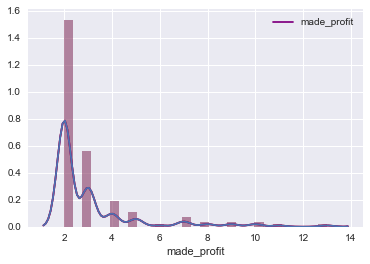

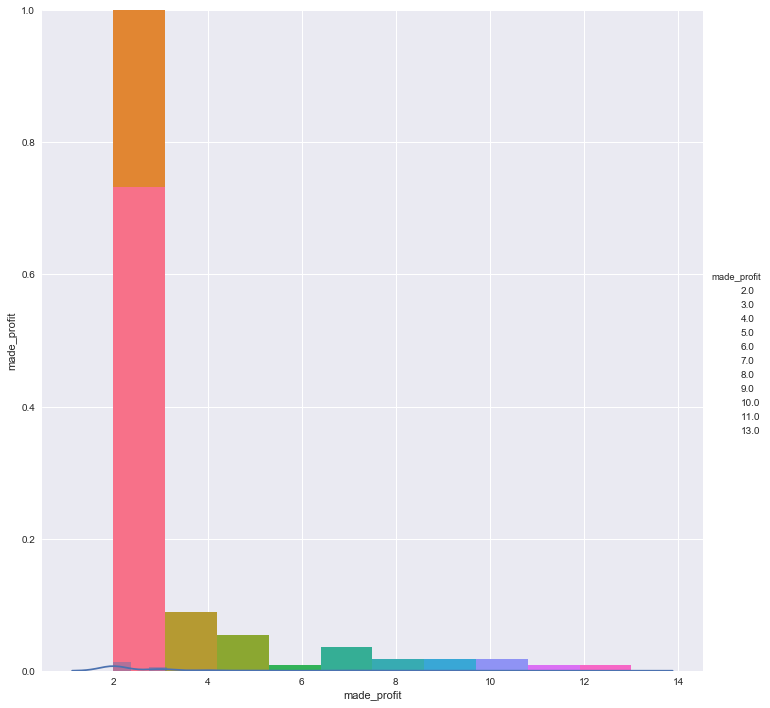

In [58]:


sns.distplot(K['made_profit'], color = 'red')
sns.kdeplot(K['made_profit'], color = 'purple' )
sns.distplot(K['made_profit'])

sns.pairplot(K, hue='made_profit', size=10);

sns.distplot(K['made_profit'])



In [59]:
X = best_vars.drop(columns=['imdb_id','made_profit_y'])
y = best_vars['made_profit_y'].values

feature_names=X.columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
ARR=[]
max_config=[]
def hyper_parametre(n,kmax):
    max_score=0.0
    for i in range(1,n+1):
        f_list=feature_names[:i]
        #print("f_list=",f_list)
        x = X_train[f_list]
        x_test=X_test[f_list]
        ar=[]
        for j in range(1,kmax+1):
            knn_model = make_pipeline( KNeighborsClassifier(n_neighbors=j) )
            knn_model.fit(x.values, y_train)
            y_prediction = knn_model.predict(x_test) 
            score=accuracy_score(y_test, y_prediction)
            if score>max_score:
                max_score=score
                max_config.append([i,j,f_list])
            ar.append(accuracy_score(y_test, y_prediction))
        ARR.append(ar)
        
    return max_score,max_config
            
mscore,mconfig=hyper_parametre(10,30)        
print("MAX SCORE = {} @ variables = {} ({}) & num_clusters = {}".format(mscore,mconfig[-1][0],mconfig[-1][2],mconfig[-1][1]))


MAX SCORE = 0.8586956521739131 @ variables = 2 (['critic_percent', 'audience_percent']) & num_clusters = 11


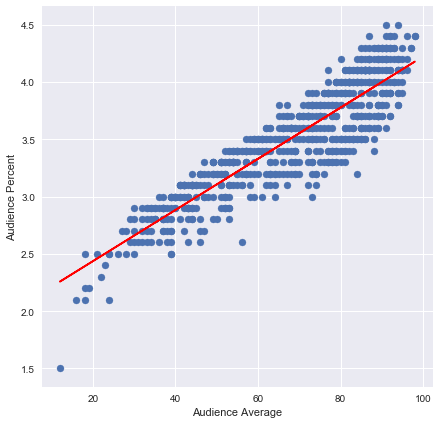

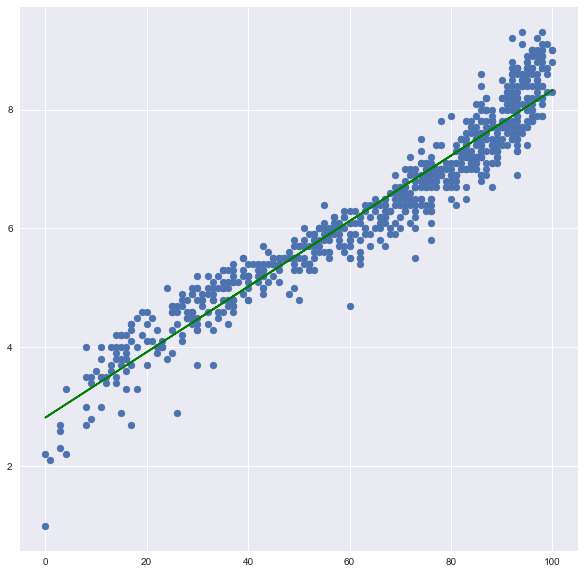

In [70]:

#https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
k = best_vars_final[[
 'audience_percent',
 'audience_average']]
#sns.pairplot(k)


import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

X = k.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = k.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.figure(figsize = (7,7))
plt.ylabel('Audience Percent')

plt.xlabel('Audience Average')
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

s = best_vars_final[[
 'critic_percent',
 'critic_average']]

X = s.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = s.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
plt.figure(figsize = (10,10))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='green',alpha = 1.0)
plt.show()



#sns.pairplot(best_variables.dropna())

# X =  .drop(columns=['imdb_id','made_profit_y'])
# Y = 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

# knn_model = make_pipeline( KNeighborsClassifier(n_neighbors=j) )
#             knn_model.fit(x.values, y_train)
#             y_prediction = knn_model.predict(x_test) 
    


# wiki_movies['pre_profit'] 


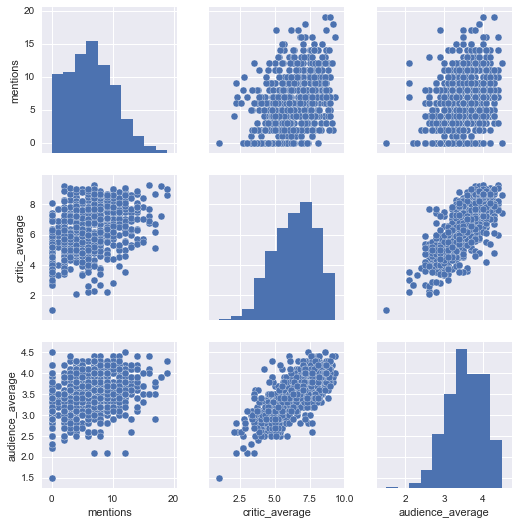

In [61]:
# audience ratings vs awards + nominations. 

df = best_vars_final 

df['mentions'] = df['num_nominations'] + df['num_awards'] + df['num_oscars']+df['num_golden_globe']+ df['num_bafta'] 


sns.pairplot(df[['mentions', 'critic_average', 'audience_average']])





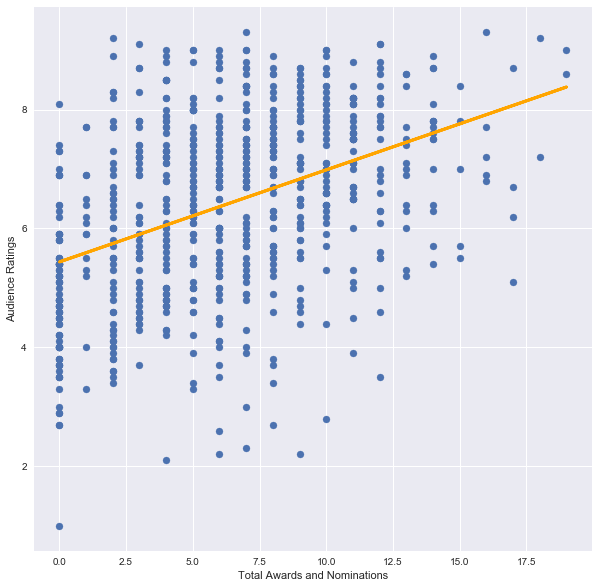

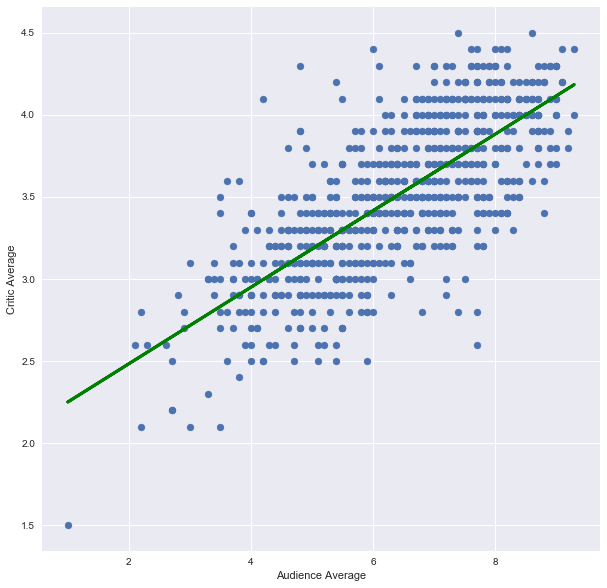

In [62]:
s = df[['mentions', 'critic_average', 'audience_average']]
import seaborn as sns
sns.set()
X = s.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = s.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression

Y_pred = linear_regressor.predict(X) 
import seaborn as sns
sns.set()
plt.figure(figsize = (10,10))

plt.ylabel('Audience Ratings')

plt.xlabel('Total Awards and Nominations')
plt.scatter(X, Y)

plt.plot(X, Y_pred, color='orange',linewidth = 3.0)

plt.show()

j = df[[ 'critic_average', 'audience_average']]
import seaborn as sns
sns.set()
X = j.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = j.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

import seaborn as sns
sns.set()
plt.figure(figsize = (10,10))

plt.ylabel('Critic Average')

plt.xlabel('Audience Average')
plt.scatter(X, Y)

plt.plot(X, Y_pred, color='green',linewidth = 3.0)

plt.show()







In [63]:
# Predicting Profit using audience_avg , crictic_avg, mentions

df1 = df[['audience_average','critic_average', 'mentions' ]]

X = df1.values
y = df['made_profit_x'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)





from sklearn.neighbors import KNeighborsClassifier 
knn_model = make_pipeline(
    KNeighborsClassifier(n_neighbors=22)
    )
knn_model.fit(X_train, y_train)
y_prediction = knn_model.predict(X_test) 
print('Predicting Profit using audience_avg , crictic_avg, mentions KNN_model')

print(accuracy_score(y_test, y_prediction))

from sklearn.svm import SVC    
svc_model = make_pipeline(SVC(kernel='linear',C=0.1))
svc_model.fit(X_train, y_train)
y_prediction = svc_model.predict(X_test) 
print('Predicting Profit using audience_avg , crictic_avg, mentions SVC_model')

print(accuracy_score(y_test, y_prediction))


from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

y_prediction = bayes_model.predict(X_test) 
print('Predicting Profit using audience_avg , crictic_avg, mentions Gaussian_model')
print(accuracy_score(y_test,y_prediction))


Predicting Profit using audience_avg , crictic_avg, mentions KNN_model
0.8641304347826086
Predicting Profit using audience_avg , crictic_avg, mentions SVC_model
0.8641304347826086
Predicting Profit using audience_avg , crictic_avg, mentions Gaussian_model
0.8478260869565217


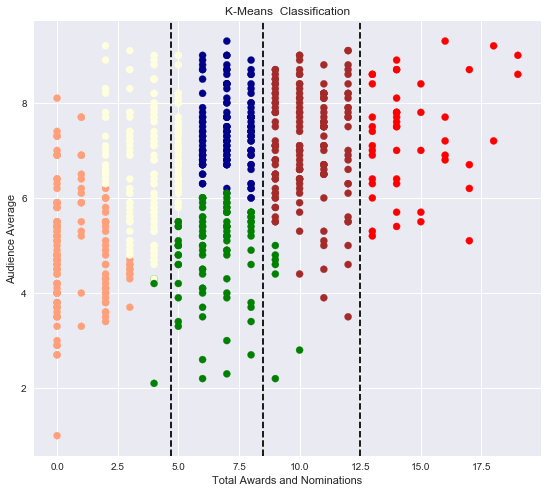

In [67]:
# https://stackoverflow.com/questions/28227340/kmeans-scatter-plot-plot-different-colors-per-cluster

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
f = df[['audience_average', 'critic_average' , 'mentions'  ]]

# # Scaling the data to normalize
# model = KMeans(n_clusters=10).fit(f)

# # Visualize it:
# plt.figure(figsize=(8, 6))
# plt.scatter(f[:0],f[:1])

%matplotlib inline
clustering = KMeans(n_clusters = 6, random_state = 10)
clustering.fit(f)

color_theme = np.array(['darkblue', 'lightsalmon', 'red', 'lightyellow', 'brown', 'green'])



plt.figure(figsize =(20,8))
# plt.subplot(1,2,1)
# plt.scatter(x=f['audience_average'], y=f['mentions'], c = color_theme ,s=50)
# plt.title('K-Means  Classification')

plt.subplot(1,2,2)
plt.ylabel('Audience Average')

plt.xlabel('Total Awards and Nominations')
plt.scatter(x = f['mentions'],y = f['critic_average'] , c = color_theme[clustering.labels_], s=50 )
plt.axvline(12.5, color="k", linestyle="--");
plt.axvline(8.5, color="k", linestyle="--");
plt.axvline(4.7, color="k", linestyle="--");
plt.title('K-Means  Classification')

import plotly.express as px

# fig = px.scatter(f, x="mentions", y="critic_average", color="mentions",
#                  size='critic_average', hover_data=['mentions'])
# fig.show()

# import plotly.express as px

# fig = px.scatter(f, x="mentions", y="critic_average", color="mentions",
#                  size='critic_average', hover_data=['mentions'])
# fig.show()

fig = px.scatter(f, x="mentions", y="audience_average", color="mentions",
                  size='critic_average', hover_data=['mentions'])
fig.show()



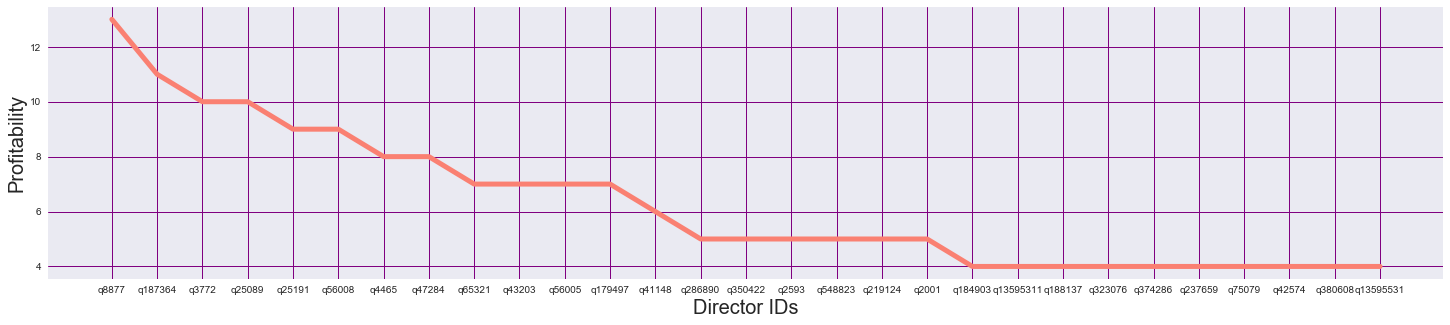

In [65]:
#directors with most profit. 


nk = K[K['made_profit']>=4]

labels = np.array(list(nk.director))

numbers = np.array(list(nk.made_profit))



plt.figure(figsize=(25, 5))
plt.grid(True, color= 'purple')
plt.ylabel('Profitability',fontsize=20)

plt.xlabel('Director IDs',fontsize=20)
plt.plot(labels,numbers, color = 'salmon', linewidth = 5.0 ) 







In [66]:
#https://plot.ly/python/bubble-charts/

#https://stackoverflow.com/questions/28999287/generate-random-colors-rgb

labels2 = ['Steven Speilberg' , 
           'Robert Zemeckis' , 
           'Quintan Tarantino', 
           'Woody Allen',
           'Christopher Nolan' , 
           'Tim Burton',
           'Peter Jackson' ,
           'Robert Rodriguez',
           'Wolfgang Peterson',
           'Clint Eastwood', 
           'Ridley Scott',
           'Oliver Stone' ,
           'Martin Scoresese',
           'Harold Ramis']  
size = numbers[:12]/numbers.sum()
size1 = size*1000
import plotly.graph_objects as go

import random

number_of_colors = 29

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]


fig = go.Figure(data=[go.Scatter(
    x=labels2, y=numbers[:12],
    mode='markers',
    marker=dict(
       color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)],
        opacity=[1, 0.8, 0.6, 0.4],
        size=size1,
    )
)])

fig.show()